In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/Military%20expenditure%20by%20country%20from%201970-2020/military%20expenditure.csv')

df=df[df.year >= 1950]

def map(series):   
      return list(series)
dfagg =df.groupby(['country']).agg({'year':map,'Military expenditure (current USD)':map,'Military expenditure (% of general government expenditure)':map,"Military expenditure (% of GDP)":map})

dfagg = dfagg[dfagg.index.isin(['Russian Federation','Ukraine','China','United States'])]

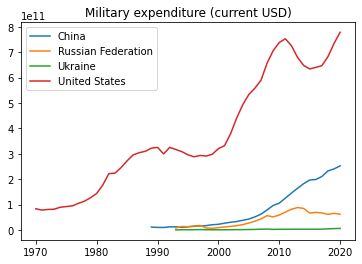

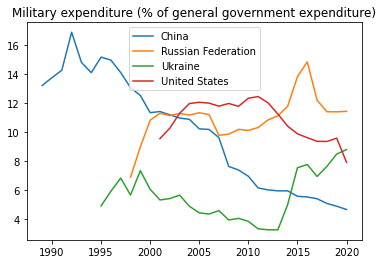

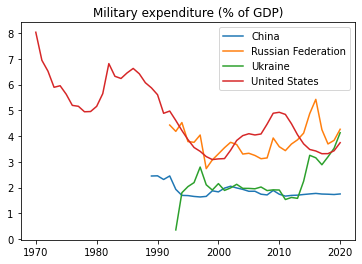

In [4]:
for column in dfagg.columns[1:]:
    for index,row in dfagg[['year',column]].iterrows():
        plt.plot(row[0],row[1],label=index)
    plt.legend()
    plt.title(column)
    plt.show()

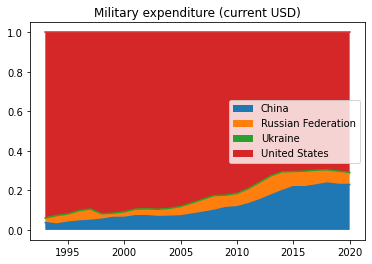

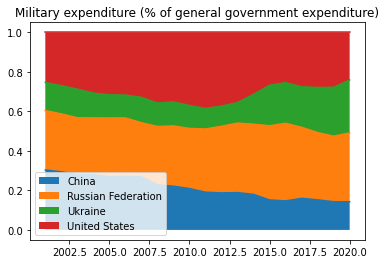

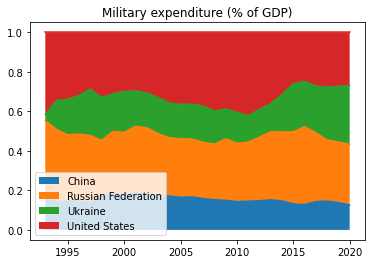

In [5]:
for column in dfagg.columns[1:]:
    buildUpSum1 = np.array([0.0]*51)
    for index,row in dfagg[['year',column]].iterrows():
        buildUpSum1 += row[1]
    
    buildUpSum2 = np.array([0.0]*51)
    prev = 0
    for index,row in dfagg[['year',column]].iterrows():
        buildUpSum2 += row[1]
        plt.plot(row[0],buildUpSum2/buildUpSum1)
        plt.fill_between(row[0], prev, buildUpSum2/buildUpSum1,label=index)
        prev = buildUpSum2/buildUpSum1
    plt.legend()
    plt.title(column)
    plt.show()